In [29]:
import numpy as np
import earthview as ev

Download single file to inspect (Huggingface Hub)

In [30]:
from huggingface_hub import hf_hub_download

repo_id = "satellogic/EarthView"
filename = "train-00000-of-00010.parquet"
subfolder = "sentinel_2/sentinel_2-0"

# Download the parquet file from the Hugging Face Hub
local_path_hub = hf_hub_download(
    repo_id=repo_id, 
    filename=filename, 
    subfolder=subfolder,
    repo_type="dataset" # This is definitely needed to download it without getting HTTPError
)

print(f"Downloaded {filename} to {local_path_hub}")



Downloaded train-00000-of-00010.parquet to /home/scheurender/.cache/huggingface/hub/datasets--satellogic--EarthView/snapshots/b7d61fa6877b55d7f46eb4ee9c6daed38dbbcbab/sentinel_2/sentinel_2-0/train-00000-of-00010.parquet


Read parquet file with PyArrow

In [31]:
import pyarrow.parquet as pq

test_table = pq.read_table(local_path_hub)

In [4]:
import pandas as pd

# Some stats from the downloaded parquet files

print(f"Num rows: {test_table.num_rows}")
print(f"Num columns: {test_table.num_columns}")
print(f"Column names: {test_table.column_names}")

# Slice first few rows
slice0 = test_table.slice(0, 1)

# print(slice0)

# Convert it to pandas DataFrame
df = slice0.to_pandas()

print(df.head())

Num rows: 53
Num columns: 6
Column names: ['10m', '20m', '40m', 'rgb', 'scl', 'metadata']
                                                 10m  \
0  [[[[ 36  62  95  83  50  50  59  77  62  55  6...   

                                                 20m  \
0  [[[[ 14  17  13  13  13  14  15  10  10  11  1...   

                                                 40m  \
0  [[[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...   

                                                 rgb  \
0  [[[[ 22  29  29  27  22  19  23  25  21  18  2...   

                                                 scl  \
0  [[[[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 ...   

                                            metadata  
0  {'s3Path': ['tiles/32/N/PF/2019/5/12/0', 'tile...  


In [5]:
# Check the shape of the dataframe

print(df.shape)
print(df.info())

(1, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   10m       1 non-null      object
 1   20m       1 non-null      object
 2   40m       1 non-null      object
 3   rgb       1 non-null      object
 4   scl       1 non-null      object
 5   metadata  1 non-null      object
dtypes: object(6)
memory usage: 180.0+ bytes
None


In [27]:
print(type(df["10m"]))
print(df["rgb"].size)
print(df["rgb"])

print(df["rgb"].iloc[0][0].shape)       # The bands of the RGB image
print(df["rgb"].iloc[0][0][0].shape)    # The shape of the rows

<class 'pandas.core.series.Series'>
1
0    [[[[ 22  29  29  27  22  19  23  25  21  18  2...
Name: rgb, dtype: object
(3,)
(384,)


In [ ]:
# Use imshow

# 1. Visualise a single band with imshow
# 2. Visualise all bands with imshow and check shape of the image
# 3. Check the preprocessing steps done
# 4. Add some noise


Type/shape of array:
red: <class 'numpy.ndarray'>, (384, 384)
green: <class 'numpy.ndarray'>, (384, 384),
blue: <class 'numpy.ndarray'>, (384, 384)
(384, 384)
Shape of the RGB image: (3, 384, 384) (C, H, W)
Shape of the RGB image: (384, 384, 3) (H, W, C)


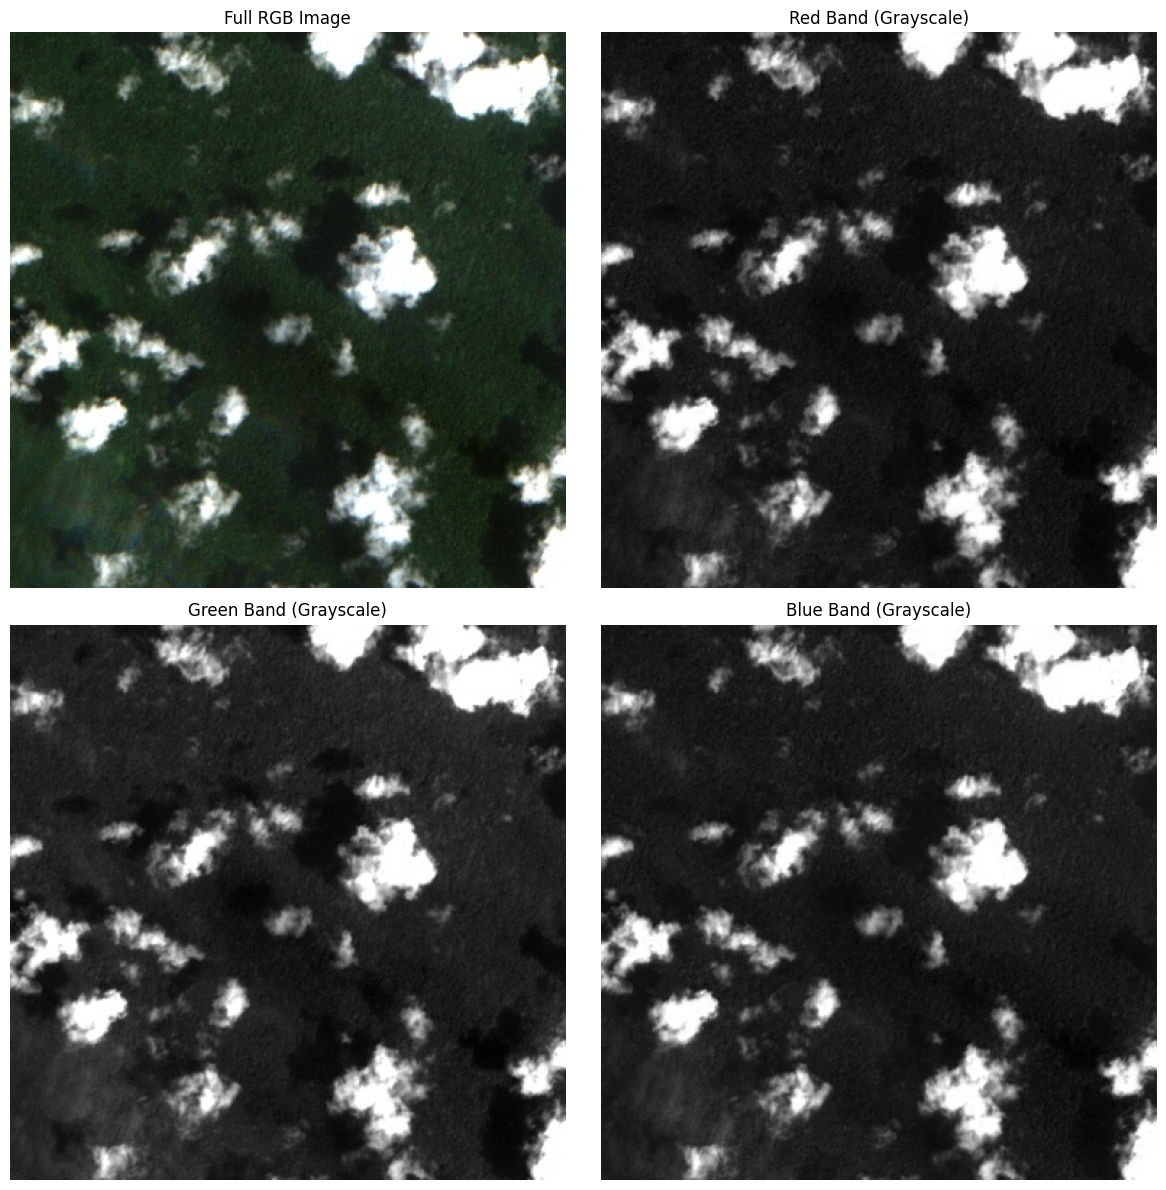

In [80]:
import matplotlib.pyplot as plt

rgb = df["rgb"].iloc[0][0]  # Get the RGB image from the first row

# ----------------------------
# 1. Make image with single band in grayscale
# ----------------------------

# Separate the bands
red_band, green_band, blue_band = np.vstack(rgb[0]), np.vstack(rgb[1]), np.vstack(rgb[2])

print(f"Type/shape of array:\n"
      f"red: {type(red_band)}, {red_band.shape}\n" 
      f"green: {type(green_band)}, {green_band.shape},\n" 
      f"blue: {type(blue_band)}, {blue_band.shape}")

if(type(red_band) is np.ndarray or 
   type(green_band) is np.ndarray or
   type(blue_band) is np.ndarray):  # Check if red_band is a numpy array  
    print(red_band.shape)
    
# plt.figure(figsize=(8,8))
# plt.imshow(red_band, cmap='gray')

# ----------------------------
# 2. Make full image
# ----------------------------

# Stack the bands to create a full RGB image
rgb_img_chw  = np.stack((red_band, green_band, blue_band)) # With stack we create (Channels (C), Height (H), Width (W)) shape
rgb_img_hwc = np.transpose(rgb_img_chw, (1, 2, 0)) # Transpose to (Height (H), Width (W), Channels (C)) for imshow

print(f"Shape of the RGB image: {rgb_img_chw.shape} (C, H, W)")
print(f"Shape of the RGB image: {rgb_img_hwc.shape} (H, W, C)")

# plt.imshow(rgb_img_hwc)  # Show the image in HWC format

# plt.imshow()

# ----------------------------
# Show both images in same figure
# ----------------------------

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# Set axes
ax1.imshow(rgb_img_hwc)  # Show the full RGB image
ax1.set_title('Full RGB Image')
ax1.axis('off')

ax2.imshow(red_band, cmap='gray')
ax2.set_title('Red Band (Grayscale)')
ax2.axis('off')

ax3.imshow(green_band, cmap='gray')
ax3.set_title('Green Band (Grayscale)')
ax3.axis('off')

ax4.imshow(blue_band, cmap='gray')
ax4.set_title('Blue Band (Grayscale)')
ax4.axis('off')



plt.tight_layout()
plt.show()



# 2. Visualise all bands with imshow (through earthview included functions)



# Show the first image in the dataframe
# ev.item_to_images("sentinel_2", df.iloc[0])

In [7]:
# # https://discuss.huggingface.co/t/download-only-a-subset-of-a-split/16410
# # https://discuss.huggingface.co/t/loading-just-part-of-dataset/38463
# # https://huggingface.co/docs/datasets/stream#split-dataset

# # some_data = ds.load_dataset('bookcorpus', split='train', streaming=True)
# # print(list(some_data.take(1)))
# # 
# import datasets as ds

# hf_dataset = ds.load_dataset("satellogic/EarthView", split="train", streaming=True)
